In [53]:
# import lib
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [54]:
df = pd.read_csv("FuelConsumption.csv",encoding = "ISO-8859-1")
df.dropna(inplace=True)
df.head(5)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32.0,202.0
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34.0,193.0
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34.0,191.0
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26.0,251.0
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25.0,260.0


In [55]:
list(df.columns.values) # list of columns 

['MODEL',
 'MAKE',
 'MODEL.1',
 'VEHICLE CLASS',
 'ENGINE SIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUEL',
 'FUEL CONSUMPTION',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'CO2 EMISSIONS ']

In [56]:
# Lets select some features that we want to use for regression.
cdf = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','CO2 EMISSIONS ']]
cdf.head(10)
df.dropna(inplace=True)


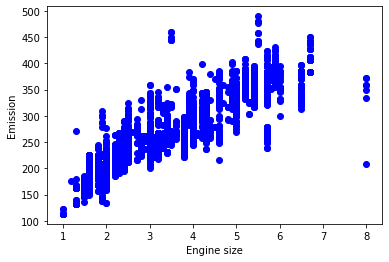

In [57]:
plt.scatter(cdf["ENGINE SIZE"], cdf["CO2 EMISSIONS "],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [58]:
# Train Test Split 
partition = np.random.rand(len(df)) < 0.8
train = cdf[partition]
test = cdf[~partition]

In [59]:
# Linear regreesion with sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  

In [60]:
train_x = np.asanyarray(train[['ENGINE SIZE']])
train_y = np.asanyarray(train[['CO2 EMISSIONS ']])

test_x = np.asanyarray(test[['ENGINE SIZE']])
test_y = np.asanyarray(test[['CO2 EMISSIONS ']])

In [61]:
regressor = LinearRegression()  
regressor.fit(train_x, train_y) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# The coefficients
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [[39.92268841]]
Intercept:  [128.2281815]


Text(0, 0.5, 'Emission')

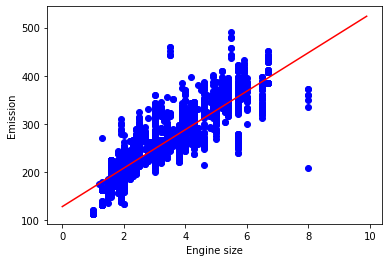

In [66]:
plt.scatter(cdf["ENGINE SIZE"], cdf["CO2 EMISSIONS "],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regressor.intercept_[0]+ regressor.coef_[0]*XX
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [68]:
# Evaluation
from sklearn.metrics import r2_score
test_y_ = regressor.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.90
Residual sum of squares (MSE): 847.37
R2-score: 0.73


In [73]:
# ploynominal Regression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x) # create power 2 of X


In [74]:
reg2 = linear_model.LinearRegression()
train_y_ = reg2.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', reg2.coef_)
print ('Intercept: ',reg2.intercept_)

Coefficients:  [[ 0.         62.13708665 -2.93613207]]
Intercept:  [92.30455842]


Text(0, 0.5, 'Emission')

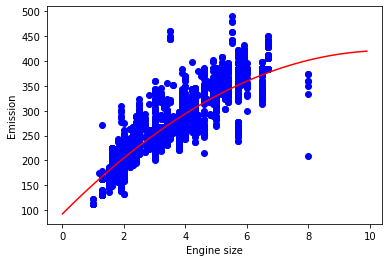

In [78]:
plt.scatter(cdf["ENGINE SIZE"], cdf["CO2 EMISSIONS "],  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = reg2.intercept_[0]+ reg2.coef_[0][1]*XX+ reg2.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [79]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = reg2.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.60
Residual sum of squares (MSE): 824.93
R2-score: 0.74
